In [ ]:
##Data Analysis of Movie Ratings

In [1]:
#Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In C:\Users\Spardha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Spardha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Spardha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Spardha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Spardha\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

In [72]:
#read data

In [73]:
dare=pd.read_csv('C:/Users/Spardha/Desktop/online labs/tv_shows.csv')

In [74]:
dare.head(n=5) #interpreting first five rows

,Unnamed: 0,Title,Year,Age,IMDb
0,0,Breaking Bad,2008,18+,9.5
1,1,Stranger Things,2016,16+,8.8
2,2,Money Heist,2017,18+,8.4
3,3,Sherlock,2010,16+,9.1
4,4,Better Call Saul,2015,18+,8.7


In [75]:
dare=dare.drop(columns=['Unnamed: 0'])

In [76]:
dare.columns

Index(['Title', 'Year', 'Age', 'IMDb'], dtype='object')

In [77]:
dare.describe() #summary statistics

,Year,IMDb
count,5611.000000,4450.000000
mean,2011.021030,7.113258
std,11.005116,1.132060
min,1901.000000,1.000000
25%,2010.000000,6.600000
50%,2015.000000,7.300000
75%,2017.000000,7.900000
max,2020.000000,9.600000


<AxesSubplot:>

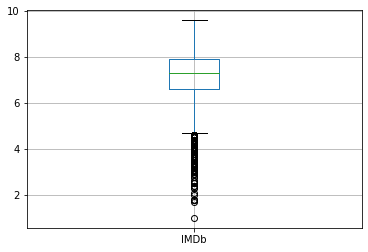

In [78]:
dare.boxplot('IMDb')

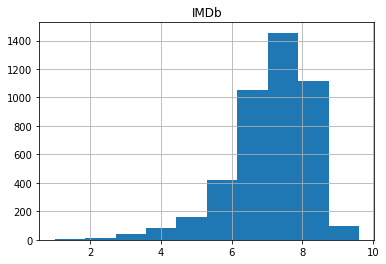

In [79]:
dare.hist('IMDb')
plt.show()

In [80]:
dare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
Title    5611 non-null object
Year     5611 non-null int64
Age      3165 non-null object
IMDb     4450 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 175.5+ KB


In [81]:
##Data Cleaning
#calculate number of missing values in each column

In [82]:
dare.isnull().tail(n=10)

,Title,Year,Age,IMDb
5601,False,False,False,False
5602,False,False,True,False
5603,False,False,True,True
5604,False,False,True,True
5605,False,False,True,True
5606,False,False,True,True
5607,False,False,True,True
5608,False,False,True,True
5609,False,False,True,True
5610,False,False,True,True


In [83]:
dare.isnull().sum()

Title       0
Year        0
Age      2446
IMDb     1161
dtype: int64

In [84]:
dare[dare.IMDb>9.5]

,Title,Year,Age,IMDb
3023,Destiny,2014,NaN,9.6


In [85]:
dare.drop([3023],inplace=True)

In [86]:
dare[3020:3024]

,Title,Year,Age,IMDb
3020,Rock of Love with Bret Michaels,2007,18+,4.8
3021,Siblings,2014,NaN,7.1
3022,Safe Harbor,1999,NaN,7.3
3024,Alguien Te Mira,2010,7+,7.4


<AxesSubplot:>

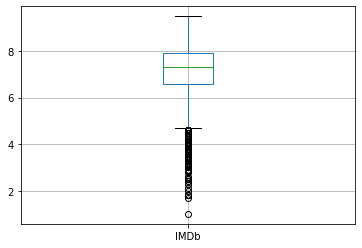

In [87]:
dare.boxplot('IMDb')

array([[<AxesSubplot:title={'center':'IMDb'}>]], dtype=object)

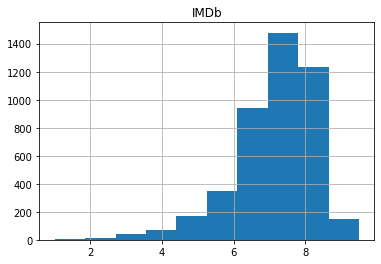

In [88]:
dare.hist('IMDb') #rightly skewed

In [89]:
##remove columns that are 90% empty

In [90]:
thres=len(dare)*0.1 #10% of rows, total rows=5610
thres

561.0

In [91]:
dare.dropna(thresh=thres,axis=1,inplace=True)

In [92]:
print(dare.isnull().sum())

Title       0
Year        0
Age      2445
IMDb     1161
dtype: int64


In [93]:
dare.shape

(5610, 4)

In [94]:
#Data Manipulation
#fill null values with mean, median or mode

In [95]:
#define a function input_median
def input_median(series):
    return series.fillna(series.median())

In [96]:
dare.IMDb=dare['IMDb'].transform(input_median)

In [97]:
dare.isnull().sum()

Title       0
Year        0
Age      2445
IMDb        0
dtype: int64

In [98]:
print(dare['Age'].mode())

0    16+
dtype: object


In [99]:
#missing value in categorical column
dare['Age'].fillna(str(dare['Age'].mode().values[0]),inplace=True)

In [100]:
dare.isnull().sum()

Title    0
Year     0
Age      0
IMDb     0
dtype: int64

In [101]:
dare.head(n=6)

,Title,Year,Age,IMDb
0,Breaking Bad,2008,18+,9.5
1,Stranger Things,2016,16+,8.8
2,Money Heist,2017,18+,8.4
3,Sherlock,2010,16+,9.1
4,Better Call Saul,2015,18+,8.7
5,The Office,2005,16+,8.9


In [102]:
dare['Age']=dare['Age'].apply(lambda x: str(x).replace('+','') if  '+' in str(x) else str(x))

In [103]:
dare['Age']=pd.to_numeric(dare['Age'],errors='coerce')

In [104]:
print(type(dare.Age))

<class 'pandas.core.series.Series'>


In [105]:
dare.describe() #new summary statistics

,Year,Age,IMDb
count,5610.000000,5065.000000,5610.000000
mean,2011.020499,14.786969,7.151462
std,11.006025,3.562552,1.010532
min,1901.000000,7.000000,1.000000
25%,2010.000000,16.000000,6.800000
50%,2015.000000,16.000000,7.300000
75%,2017.000000,16.000000,7.700000
max,2020.000000,18.000000,9.500000


In [106]:
#Data Visulisation

In [122]:
grp=dare.groupby('Year')
x=grp['IMDb'].agg(np.mean)
y=grp['Age'].agg(np.mean)

In [123]:
print(y)


Year
1901    16.000000
1904    16.000000
1914    16.000000
1931    16.000000
1932          NaN
          ...    
2016    15.100935
2017    15.460925
2018    15.288462
2019    15.129973
2020    15.940828
Name: Age, Length: 81, dtype: float64


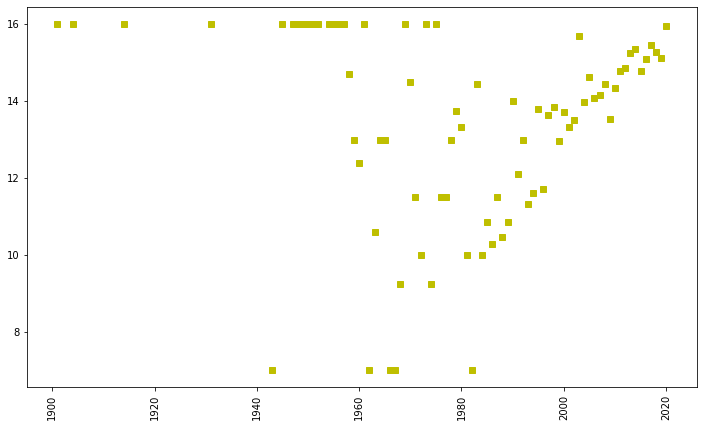

In [124]:
plt.figure(figsize=(12,7))
plt.plot(y,'bs',color='y')
plt.xticks(rotation=90)
plt.show()

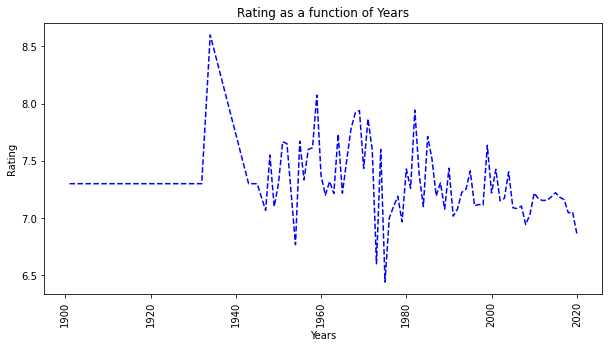

In [125]:
plt.figure(figsize=(10,5))
plt.plot(x,'r--',color='b')
plt.xticks(rotation=90)
plt.title('Rating as a function of Years')
plt.xlabel('Years')
plt.ylabel('Rating')
plt.show()

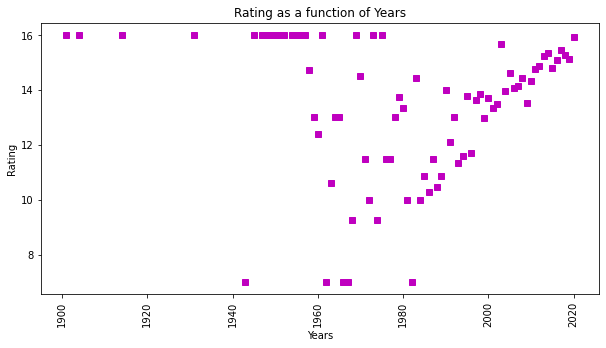

In [126]:
plt.figure(figsize=(10,5))
plt.plot(y,'bs',color='m')
plt.xticks(rotation=90)
plt.title('Rating as a function of Years')
plt.xlabel('Years')
plt.ylabel('Rating')
plt.show()